In [ ]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm
from scipy.integrate import quad
from scipy.spatial import distance

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving concrete.csv to concrete (7).csv


In [ ]:
os.listdir()

['.config',
 'Log_ROC.png',
 'concrete (4).csv',
 'concrete (6).csv',
 'concrete (1).csv',
 'concrete (5).csv',
 'concrete (3).csv',
 'concrete.csv',
 'concrete (7).csv',
 'concrete (2).csv',
 'sample_data']

In [ ]:
data =  pd.read_csv('concrete.csv')
data_original = data.copy()

In [ ]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Below shows how to view the cardinality and dimensionality size of the data

In [ ]:
data.shape

# number 0 represent the rows and 1 is for columns
print('data has a cardinality size {}'.format(data.shape[0]) + 
      ' and dimensionality size {}'.format(data.shape[1]))

data has a cardinality size 1030 and dimensionality size 9


Checking the columns have the correct classification of data type. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Data Cleaning
Before starting, we need to check the data for any missing values and outliers.

In [ ]:
data.isna().sum()


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## As you can see, there is no NAN (not a number) in the columns.


In [ ]:
strength_max = data.strength.max()
strength_min = data.strength.min()
print("max:",strength_max)
print("min:",strength_min)

max: 82.6
min: 2.33


## Outliers
Using histograms and boxplots we can identify any ouliers in the data set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


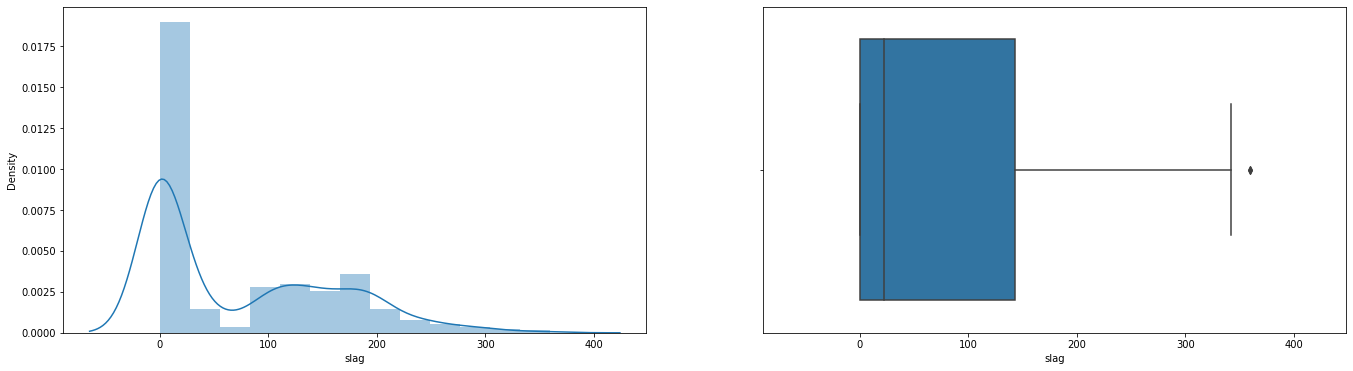

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['slag'], ax = axes[0])
sns.boxplot(data['slag'], ax = axes[1])

As we can see, the values above 350 in the slag are outliers. To clean the data we should remove all records of data past this point.




In [ ]:
data[data['slag'] > 350]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


Removing all entries that are above 350.


In [ ]:
data = data.drop(data[data['slag'] > 350].index)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


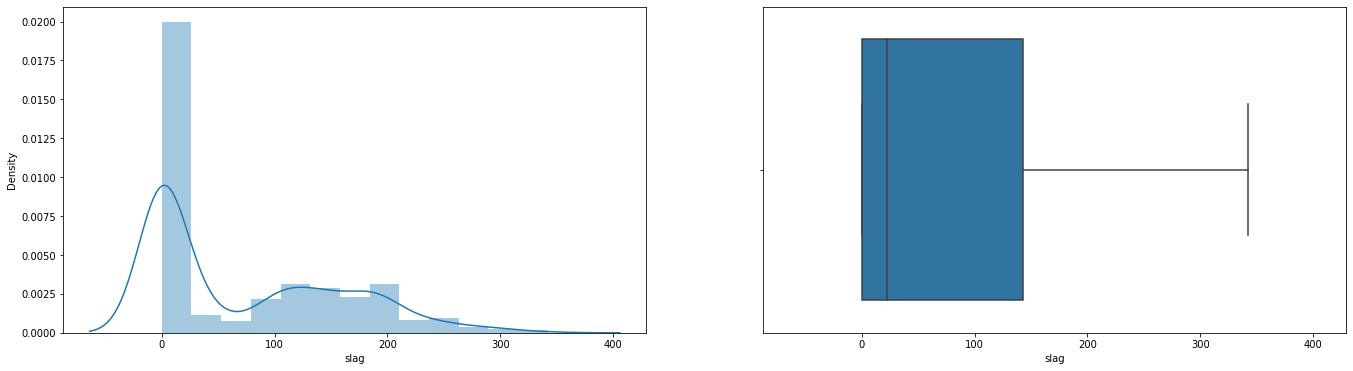

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['slag'], ax = axes[0])
sns.boxplot(data['slag'], ax = axes[1])

And now the outliers in water

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


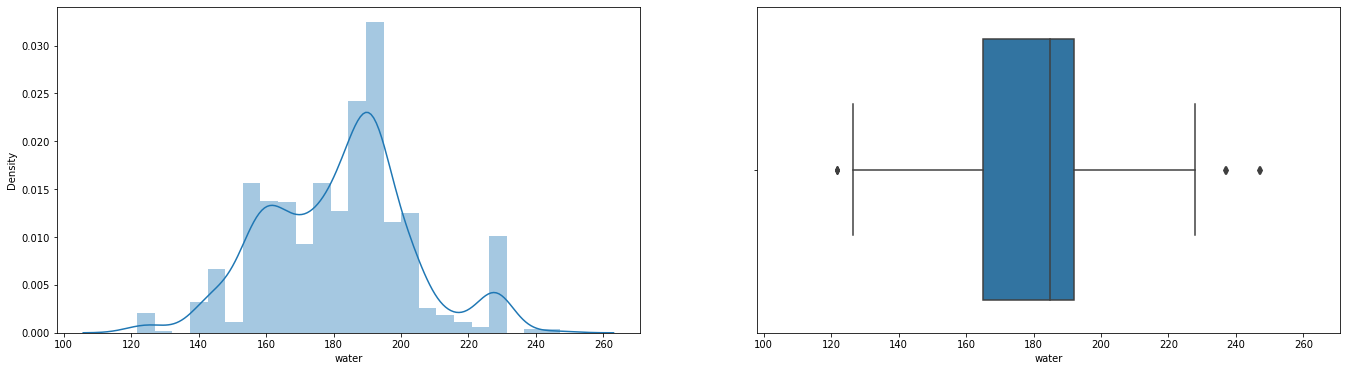

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['water'], ax = axes[0])
sns.boxplot(data['water'], ax = axes[1])

Here the outliers are before 122 and after 230.

In [ ]:
data[(data['water'] < 122) | (data['water'] > 230)] 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


So once again, we drop those values from the column.

In [ ]:
data = data.drop(data[(data['water'] < 122) | (data['water'] > 230)].index)


Further examples of cleaning; superplastic.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


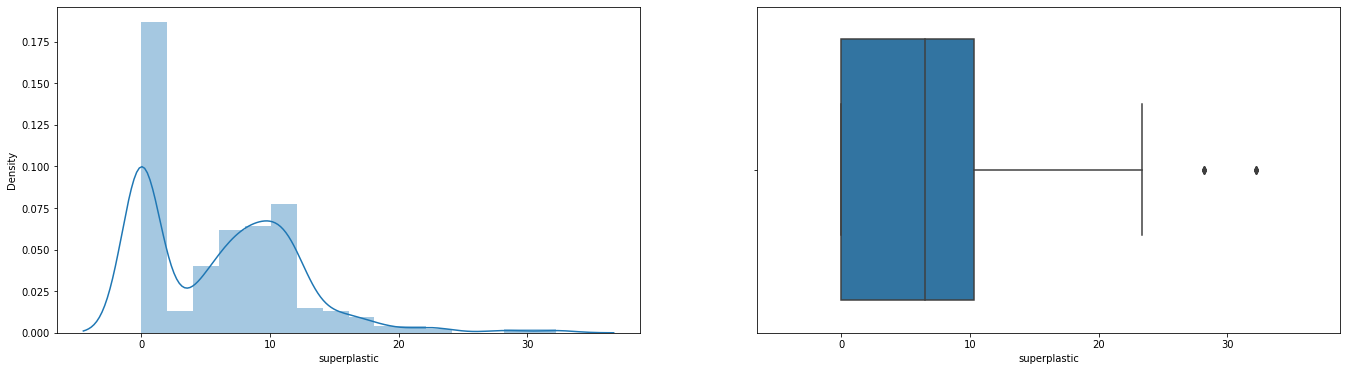

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['superplastic'], ax = axes[0])
sns.boxplot(data['superplastic'], ax = axes[1])

In [ ]:
data = data.drop(data[data['superplastic'] > 25].index)
data[data['superplastic'] > 25]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


cleaning fineagg

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


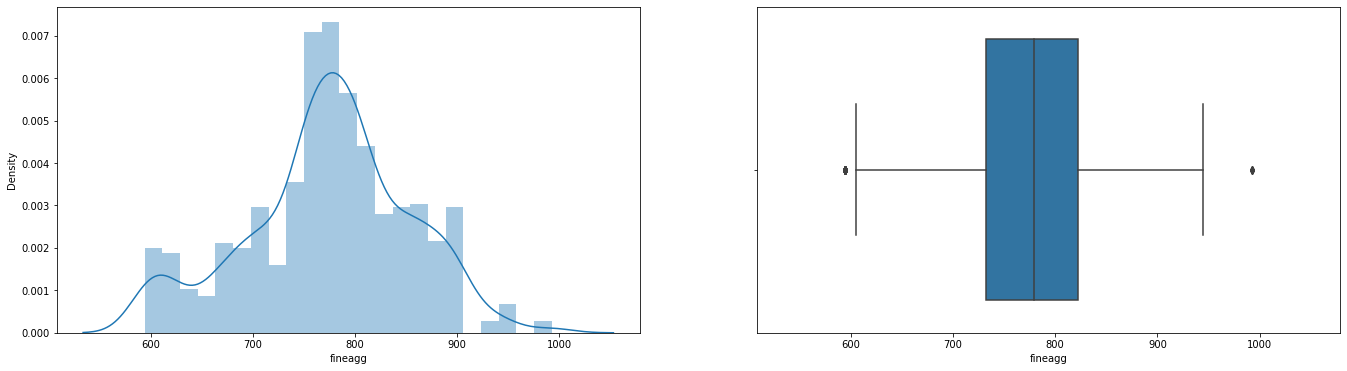

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['fineagg'], ax = axes[0])
sns.boxplot(data['fineagg'], ax = axes[1])

In [ ]:
data[(data['fineagg'] < 600) | (data['fineagg'] > 950)]


In [ ]:
data = data.drop(data[(data['fineagg'] < 600) | (data['fineagg'] > 950)].index)

Cleaning age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


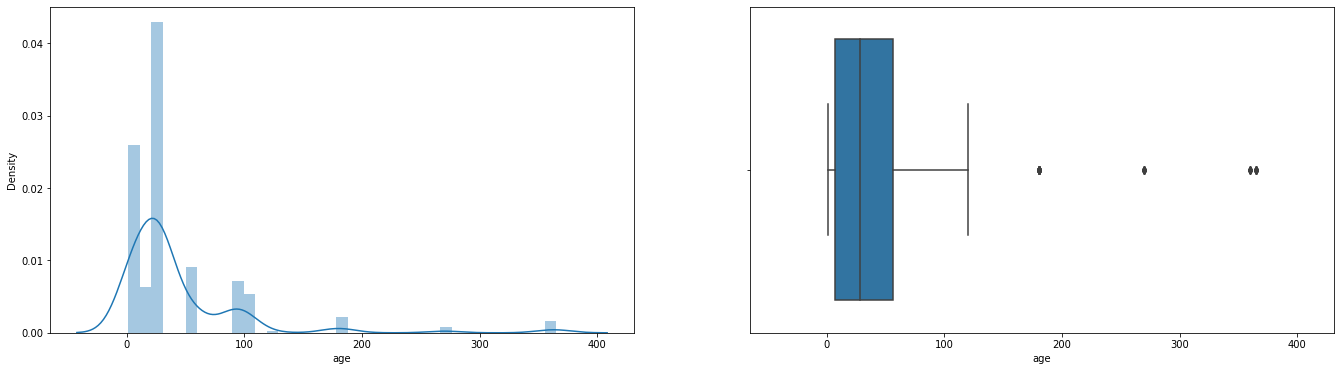

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['age'], ax = axes[0])
sns.boxplot(data['age'], ax = axes[1])

In [ ]:
data[data['age'] > 150]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
159,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,55.26
198,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
199,277.0,0.0,0.0,191.0,0.0,968.0,856.0,180,32.33
207,190.0,190.0,0.0,228.0,0.0,932.0,670.0,180,46.93


In [ ]:
data = data.drop(data[data['age'] > 150].index)


# Binning
Binning alows us to seperate our data into "bins", that are created with ranges we set. The binning that happens below divides the data into two catagories.

The first is all concrete samples that we are going to class as standard (0-50 strength). The second (50- max strength) are the samples we will class as strong.

In [ ]:
strength_max = data.strength.max()
strength_min = data.strength.min()
print("max:",strength_max)
print("min:",strength_min)

max: 82.6
min: 2.33


0    499
1    431
Name: strength_cat, dtype: int64


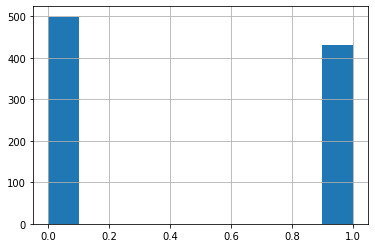

In [ ]:
strengthM = data['strength'].mean()

data['strength_cat'] = pd.cut(data['strength']
                              , bins=[0,strengthM,strength_max]
                              , labels=[0,1])
data["strength_cat"].hist()
print(data["strength_cat"].value_counts())

In [ ]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_cat
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0


In [ ]:
# class count
count_class_standard, count_class_strong = data.strength_cat.value_counts()
#Divide by class
data_class_standard = data[data['strength_cat']== 0]
data_class_strong = data[data['strength_cat']== 1]

## **Under-sampling**
The way it work is by randomly deleting samples from the major class until we reach a balance between the 2 classes.

The problem with this method is that we will lose some random samples of our data that could be useful or even critical for our dataset as it will select the samples randomly without being able to tell how useful the deleted data was otherwise.

So our data should be larg enough to handle the under-sampling

Random under-sampling:
0    431
1    431
Name: strength_cat, dtype: int64


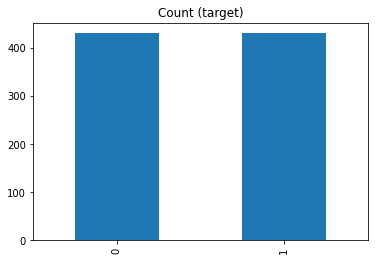

In [ ]:
data_class_standard_under = data_class_standard.sample(count_class_strong)
data_under = pd.concat([data_class_standard_under, data_class_strong], axis=0)

print('Random under-sampling:')
print(data_under.strength_cat.value_counts())

data_under.strength_cat.value_counts().plot(kind='bar', title='Count (target)');



## **Over**-**sampling**
Random over sampling will randomly create clone samples from the minority class and add them to the minority class, which will give them a higher chance to be selected.

oversampling minor class with a sever high balance can cause an overfitting for that class resulting in better performance on the training dataset but it will fail on the test dataset.

Another disadvantage of oversampling is that it increases the number of training samples which will result in increasing the training time.

Random over-sampling:
0    499
1    499
Name: strength_cat, dtype: int64


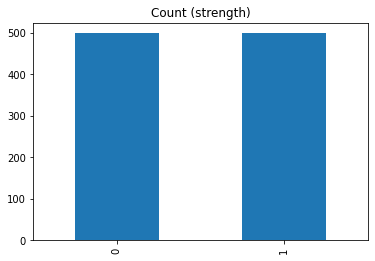

In [ ]:
data_class_strong_over = data_class_strong.sample(count_class_standard, replace=True)
data_test_over = pd.concat([data_class_standard, data_class_strong_over], axis=0)

print('Random over-sampling:')
print(data_test_over.strength_cat.value_counts())

data_test_over.strength_cat.value_counts().plot(kind='bar', title='Count (strength)');

## Quantile binning
Using quartiles to visualise the data.
The red lines outline the quartile values, to help with deciding on bins.

In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = data['strength'].quantile(quantile_list)
quantiles

0.00     2.3300
0.25    22.4925
0.50    33.4000
0.75    45.3525
1.00    82.6000
Name: strength, dtype: float64

Text(0, 0.5, 'frequency')

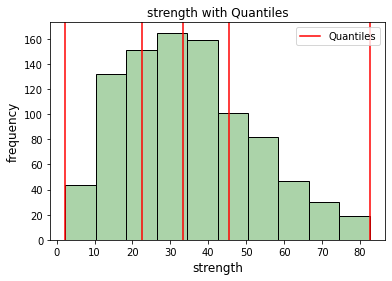

In [ ]:

'ADAPTIVE BINNING : 4-quantile'
fig, ax = plt.subplots()
data['strength'].hist(bins=10, color='#abd3a9', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('strength with Quantiles', 
             fontsize=12)
ax.set_xlabel('strength', fontsize=12)
ax.set_ylabel('frequency', fontsize=12)

## Heatmaps
Heatmaps can also be created. These help with visualizing patterns, and potential corralations within the data set.
https://seaborn.pydata.org/generated/seaborn.heatmap.html

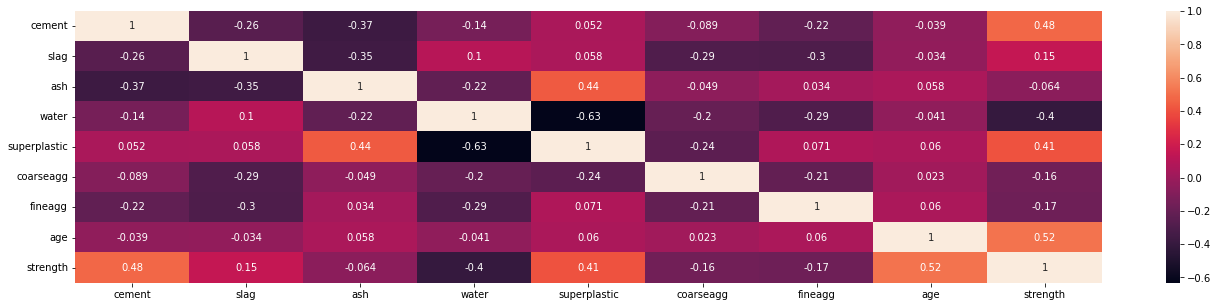

In [ ]:
plt.figure(figsize=(23,5))
sns.heatmap(data=data.corr(), annot=True);

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.258238,-0.369470,-0.140103,0.052218,-0.089384,-0.219985,-0.039477,0.483070
slag,-0.258238,1.000000,-0.352682,0.101954,0.057824,-0.288691,-0.299891,-0.034036,0.153368
ash,-0.369470,-0.352682,1.000000,-0.221016,0.438819,-0.048690,0.033982,0.057929,-0.064262
water,-0.140103,0.101954,-0.221016,1.000000,-0.632338,-0.199623,-0.288861,-0.041290,-0.397762
superplastic,0.052218,0.057824,0.438819,-0.632338,1.000000,-0.238847,0.070705,0.059866,0.408343
coarseagg,-0.089384,-0.288691,-0.048690,-0.199623,-0.238847,1.000000,-0.212737,0.023272,-0.159350
fineagg,-0.219985,-0.299891,0.033982,-0.288861,0.070705,-0.212737,1.000000,0.060164,-0.171411
age,-0.039477,-0.034036,0.057929,-0.041290,0.059866,0.023272,0.060164,1.000000,0.519314
strength,0.483070,0.153368,-0.064262,-0.397762,0.408343,-0.159350,-0.171411,0.519314,1.000000


## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# initializing standard scaler, to be used for data scaling
scaler = StandardScaler()     

In [ ]:

drop_data = data.copy()
output_data = drop_data.loc[:, ['strength_cat']]
drop_data = drop_data.drop(columns=['strength_cat'])

# Scaling PCA
drop_data_scaled = drop_data.copy()
drop_data_scaled[drop_data_scaled.columns] = scaler.fit_transform(drop_data_scaled)

In [ ]:
# n=1 as we only want to select one component
pca = PCA(n_components=1)

#selecting 3 attributes to get a combination
a_dict = dict()   # dictionary to hold the variance of group of attributes        dict[attributes-name] = 1st PCA comp

# Three attribute group
for i in range (len(drop_data_scaled.columns) - 2):
    for j in range (i+1, len(drop_data_scaled.columns) - 1):
        for k in range (j+1, len(drop_data_scaled.columns) - 0):
            input_cols = [drop_data_scaled.columns[i], drop_data_scaled.columns[j], drop_data_scaled.columns[k]]
            col_str = "" + drop_data_scaled.columns[i] + "," + drop_data_scaled.columns[j] + "," + drop_data_scaled.columns[k]
            pca_strength = pca.fit_transform(drop_data_scaled[input_cols]) # applying PCA
            var = np.round(pca.explained_variance_ratio_, decimals=3) * 100 # variance on the first component
            print(col_str,  "=" , var)
            a_dict[col_str] = var



cement,slag,ash = [46.6]
cement,slag,water = [44.8]
cement,slag,superplastic = [41.9]
cement,slag,coarseagg = [44.9]
cement,slag,fineagg = [43.5]
cement,slag,age = [41.9]
cement,slag,strength = [49.9]
cement,ash,water = [46.]
cement,ash,superplastic = [51.6]
cement,ash,coarseagg = [45.7]
cement,ash,fineagg = [48.2]
cement,ash,age = [46.1]
cement,ash,strength = [54.7]
cement,water,superplastic = [55.3]
cement,water,coarseagg = [40.3]
cement,water,fineagg = [43.5]
cement,water,age = [38.]
cement,water,strength = [56.6]
cement,superplastic,coarseagg = [42.5]
cement,superplastic,fineagg = [40.7]
cement,superplastic,age = [35.4]
cement,superplastic,strength = [55.3]
cement,coarseagg,fineagg = [42.2]
cement,coarseagg,age = [36.9]
cement,coarseagg,strength = [51.4]
cement,fineagg,age = [41.4]
cement,fineagg,strength = [53.6]
cement,age,strength = [56.3]
slag,ash,water = [48.9]
slag,ash,superplastic = [51.2]
slag,ash,coarseagg = [47.8]
slag,ash,fineagg = [49.3]
slag,ash,age = [45.5]
slag,ash,s

In [ ]:
import operator
# sorting the dictionary
sorted_dict = {k: v for k, v in sorted(a_dict.items(), key=lambda item: item[1])}
single_a_dict = dict()

count = 0

# using the first 35
for key in sorted_dict:  
    temp = key.split(",")  # key split to see attributes
    for val in temp:       # for each attribute, count how many times it is present in the ammount specified
        if val in single_a_dict:
            single_a_dict[val] += 1
        else:
            single_a_dict[val] = 1
    if count == 35:
        break
    count+=1

<BarContainer object of 9 artists>

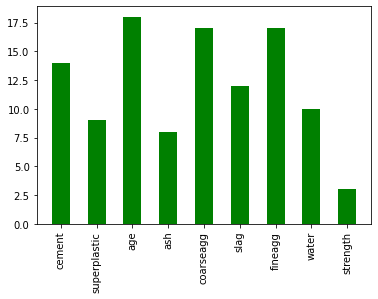

In [ ]:
#Using bargraph to visualise

df = pd.DataFrame([single_a_dict])

plt.xticks(rotation='vertical')
plt.bar(single_a_dict.keys(), single_a_dict.values(), width=0.5, color='g')




In [ ]:
df.head()

,cement,superplastic,age,ash,coarseagg,slag,fineagg,water,strength
0,14,9,18,8,17,12,17,10,3


In [ ]:
data_items = single_a_dict.items()
data_list = list(data_items)

df = pd.DataFrame(data_list)

In [ ]:
df.head()

,0,1
0,cement,14
1,superplastic,9
2,age,18
3,ash,8
4,coarseagg,17


In [ ]:
df.columns=['key','value']

In [ ]:
value_cut_off_point = 12.5

df.loc[df['value'] <= value_cut_off_point, 'key']

1    superplastic
3             ash
5            slag
7           water
8        strength
Name: key, dtype: object

In [ ]:
PCA_remove_count = len(df.loc[df['value'] <= value_cut_off_point, 'key'])
print(PCA_remove_count)

5


In [ ]:
data_under.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_cat
960,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,3,21.02,0
962,277.0,0.0,0.0,191.0,0.0,968.0,856.0,14,21.26,0
314,295.0,0.0,0.0,185.0,0.0,1069.0,769.0,7,14.80,0
217,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7,11.96,0
523,381.4,0.0,0.0,185.7,0.0,1104.6,784.3,7,14.54,0


In [ ]:
i = 0
while i < PCA_remove_count:
  x = df.loc[df['value'] <= value_cut_off_point, 'key'].iloc[i]
  data = data.drop(columns=[x])
  i = i + 1

In [ ]:
data.head()

,cement,coarseagg,fineagg,age,strength_cat
0,141.3,971.8,748.5,28,0
1,168.9,1080.8,796.2,14,0
2,250.0,956.9,861.2,28,0
3,266.0,932.0,670.0,28,1
4,154.8,1047.4,696.7,28,0


SMOTE over sampling:
0    499
1    499
Name: strength_cat, dtype: int64


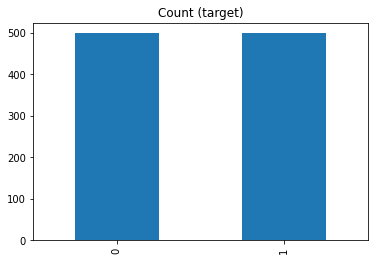

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X = data.drop(['strength_cat'], axis=1)
y = data.strength_cat

features_X, target_y = oversample.fit_resample(X, y)

print('SMOTE over sampling:')
print(target_y.value_counts())
target_y.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
X.head()

,cement,coarseagg,fineagg,age
0,141.3,971.8,748.5,28
1,168.9,1080.8,796.2,14
2,250.0,956.9,861.2,28
3,266.0,932.0,670.0,28
4,154.8,1047.4,696.7,28


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: strength_cat, dtype: category
Categories (2, int64): [0 < 1]

In [ ]:
import statsmodels.api as stat
from statsmodels.stats.outliers_influence import variance_inflation_factor 
data_final = data.copy()


#VIF calculation
VIFcalc = stat.tools.add_constant(data_final)
S = pd.Series([variance_inflation_factor(VIFcalc.values, i) for i in range(VIFcalc.shape[1])], index=VIFcalc.columns)
print('Output: \n\n{}\n'.format(S))

#print('Recomended removal:')
#for x in S.index:
#  if S.loc[x]> 6:
#    print(str(x))
#    if x != 'const':
 #     data_final = data_final.drop(columns=[str(x)])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Output: 

const           410.166414
cement            1.296978
coarseagg         1.088126
fineagg           1.145642
age               1.412767
strength_cat      1.671528
dtype: float64



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 1029
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cement        930 non-null    float64 
 1   coarseagg     930 non-null    float64 
 2   fineagg       930 non-null    float64 
 3   age           930 non-null    int64   
 4   strength_cat  930 non-null    category
dtypes: category(1), float64(3), int64(1)
memory usage: 37.4 KB


# Spliting the Data into test and train sets

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import pandas as pd

In [ ]:
data = data.copy()

y = pd.DataFrame(data.strength_cat)
X = pd.DataFrame(data, columns=data.columns)
X = X.drop(columns=['strength_cat'])



In [ ]:
X.head()

,cement,coarseagg,fineagg,age
0,141.3,971.8,748.5,28
1,168.9,1080.8,796.2,14
2,250.0,956.9,861.2,28
3,266.0,932.0,670.0,28
4,154.8,1047.4,696.7,28


In [ ]:
y.head()


,strength_cat
0,0
1,0
2,0
3,1
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=1,
                                                    stratify=y)

In [ ]:
print('X_train shape', y_train.shape, 'X_test shape', y_test.shape)

X_train shape (744, 1) X_test shape (186, 1)


In [ ]:
print('train_class_one_ratio', np.count_nonzero(y_train==1) / len(y_train))
print('test_class_one_ratio', np.count_nonzero(y_test==1) / len(y_test))

train_class_one_ratio 0.4637096774193548
test_class_one_ratio 0.46236559139784944


# Stratified k-fold cross validation, to estimate model accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier

def stacking():
  # Including the different models to be used for stacking, base level L0
	L0 = []
	L0.append(('KNN', KNeighborsClassifier()))
	L0.append(('CART', DecisionTreeClassifier()))
	L0.append(('NB', GaussianNB()))
	L0.append(('SVM', SVC(gamma='auto')))
	L0.append(('LR', LogisticRegression(max_iter=10000)))
	L0.append(('SGDClassifier', SGDClassifier(loss="hinge", penalty="l2", max_iter=10000)))
	L0.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=10)))
	L0.append(('AdaBoostClassifier', AdaBoostClassifier(n_estimators=100)))
	# Define meta learner model as L1
	L1 = LogisticRegression(max_iter=10000)
	# Define the stacking ensemble
	model = StackingClassifier(estimators=L0, final_estimator=L1, cv=10)
	return model

# Spot Check Algorithms for class_label classification
pred_models = []
pred_models.append(('KNN', KNeighborsClassifier()))
pred_models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
pred_models.append(('GaussianNB', GaussianNB()))
pred_models.append(('SupportVectorMachine', SVC(gamma='auto')))
pred_models.append(('LogisticRegression', LogisticRegression(max_iter=10000)))
pred_models.append(('SGDClassifier', SGDClassifier(loss="hinge", penalty="l2", max_iter=10000)))
pred_models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=10)))
pred_models.append(('AdaBoostClassifier', AdaBoostClassifier(n_estimators=100)))
pred_models.append(('RandomForestClassifierOPTIMISED', RandomForestClassifier(bootstrap=True, max_depth=110, max_features= 'sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=1000)))

#Stacking model 
pred_models.append(('Stacking', stacking()))


# evaluate each model, one after another.Uses 5-fold cross validation
results = []
names = []
for name, model in pred_models:
	skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cross_val_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=skf, scoring='accuracy')
	results.append(cross_val_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cross_val_results.mean(), cross_val_results.std()))




# Comparison of the different models:

KNN: 0.764820 (0.027892)
DecisionTreeClassifier: 0.817214 (0.015423)
GaussianNB: 0.778242 (0.022299)
SupportVectorMachine: 0.654571 (0.017762)
LogisticRegression: 0.815863 (0.010855)
SGDClassifier: 0.720497 (0.061346)
RandomForestClassifier: 0.842772 (0.018082)
AdaBoostClassifier: 0.846789 (0.016523)
RandomForestClassifierOPTIMISED: 0.868284 (0.017257)
Stacking: 0.736595 (0.108004)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


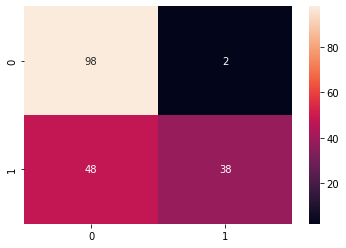

In [ ]:
stack = stacking()
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       100
           1       0.95      0.44      0.60        86

    accuracy                           0.73       186
   macro avg       0.81      0.71      0.70       186
weighted avg       0.80      0.73      0.71       186



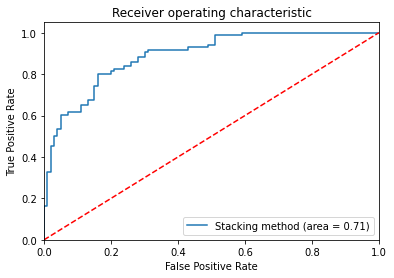

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
stack_roc_auc = roc_auc_score(y_test, stack.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, stack.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Stacking method (area = %0.2f)' % stack_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


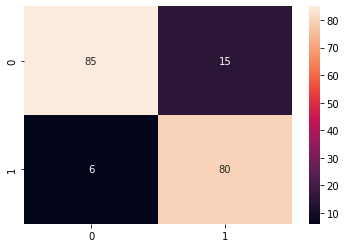

In [ ]:
RFO = RandomForestClassifier(bootstrap=True, max_depth=110, max_features= 'sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=1000)
RFO.fit(X_train, y_train)
y_pred = RFO.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       100
           1       0.84      0.93      0.88        86

    accuracy                           0.89       186
   macro avg       0.89      0.89      0.89       186
weighted avg       0.89      0.89      0.89       186



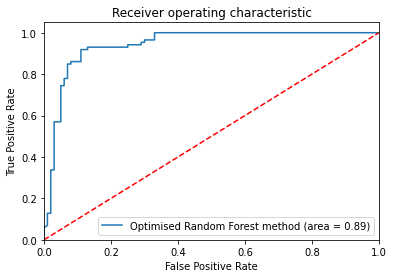

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RFO_roc_auc = roc_auc_score(y_test, RFO.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RFO.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Optimised Random Forest method (area = %0.2f)' % RFO_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


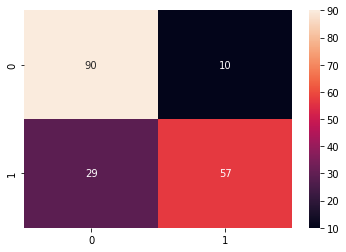

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       100
           1       0.85      0.66      0.75        86

    accuracy                           0.79       186
   macro avg       0.80      0.78      0.78       186
weighted avg       0.80      0.79      0.79       186



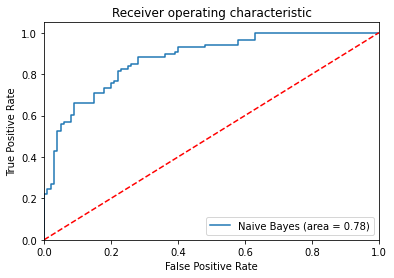

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
nb_roc_auc = roc_auc_score(y_test, nb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

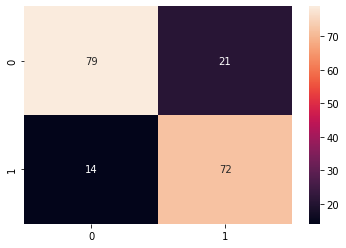

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm1, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.77      0.84      0.80        86

    accuracy                           0.81       186
   macro avg       0.81      0.81      0.81       186
weighted avg       0.81      0.81      0.81       186



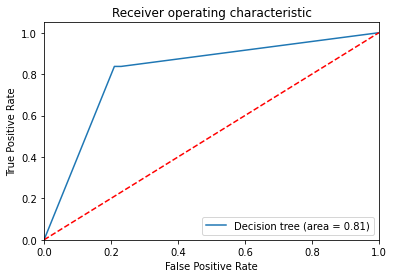

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


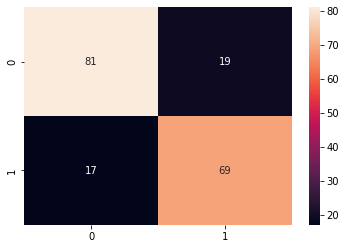

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       100
           1       0.78      0.80      0.79        86

    accuracy                           0.81       186
   macro avg       0.81      0.81      0.81       186
weighted avg       0.81      0.81      0.81       186



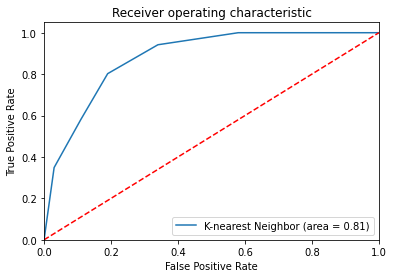

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='K-nearest Neighbor (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


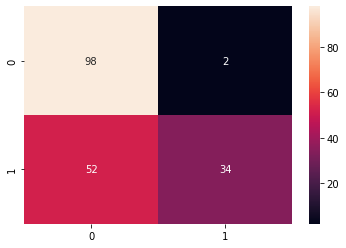

In [ ]:
SVM = SVC(gamma='auto')
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       100
           1       0.94      0.40      0.56        86

    accuracy                           0.71       186
   macro avg       0.80      0.69      0.67       186
weighted avg       0.79      0.71      0.68       186



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


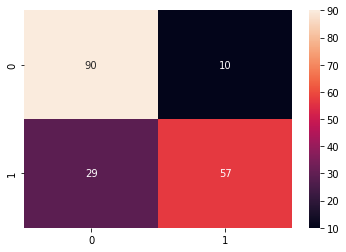

In [ ]:
LOGR = LogisticRegression()
LOGR.fit(X_train, y_train)
y_pred = nb.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       100
           1       0.85      0.66      0.75        86

    accuracy                           0.79       186
   macro avg       0.80      0.78      0.78       186
weighted avg       0.80      0.79      0.79       186



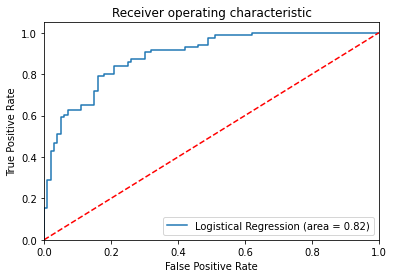

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
LOGR_roc_auc = roc_auc_score(y_test, LOGR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LOGR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistical Regression (area = %0.2f)' % LOGR_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


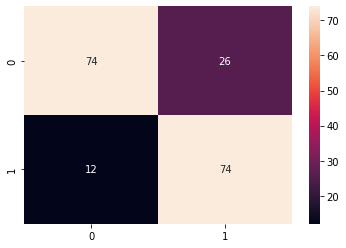

In [ ]:
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=10000)
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       100
           1       0.74      0.86      0.80        86

    accuracy                           0.80       186
   macro avg       0.80      0.80      0.80       186
weighted avg       0.80      0.80      0.80       186



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


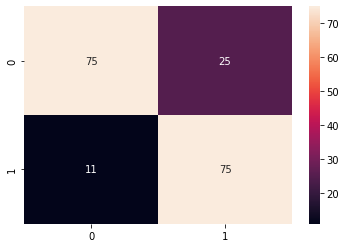

In [ ]:
ADA = AdaBoostClassifier(n_estimators=100)
ADA.fit(X_train, y_train)
y_pred = ADA.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       100
           1       0.75      0.87      0.81        86

    accuracy                           0.81       186
   macro avg       0.81      0.81      0.81       186
weighted avg       0.82      0.81      0.81       186



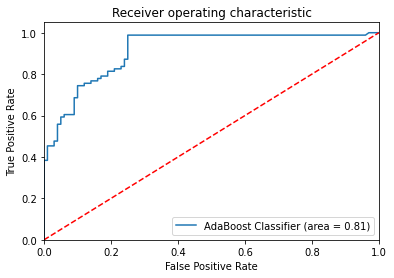

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ADA_roc_auc = roc_auc_score(y_test, ADA.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ADA.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost Classifier (area = %0.2f)' % ADA_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


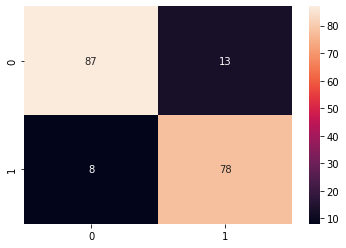

In [ ]:
RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       100
           1       0.86      0.91      0.88        86

    accuracy                           0.89       186
   macro avg       0.89      0.89      0.89       186
weighted avg       0.89      0.89      0.89       186



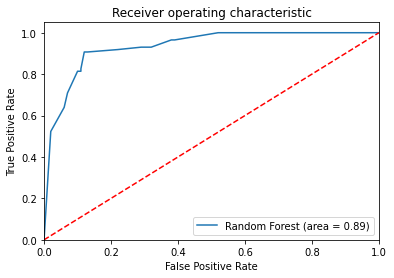

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, RF.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()